A few years ago a colleague of mine was interested in buying a used Porsche sports car and wanted to know what he should expect to pay.  He expected that the price might depend on many factors including age, mileage, and condition of the car.  For this question we will focus on the relationship between X = mileage of a used Porsche and Y = Price of the car.  You will find the data posted on Moodle in the file named PorschePrice.csv. Mileage is measured in thousands of miles and price is measured in thousands of dollars. You will need to read the data into R to answer the following questions.

##### A. Produce a scatterplot for predicting Price based on Mileage. Comment on any patterns you may see. 


[1] 30  3

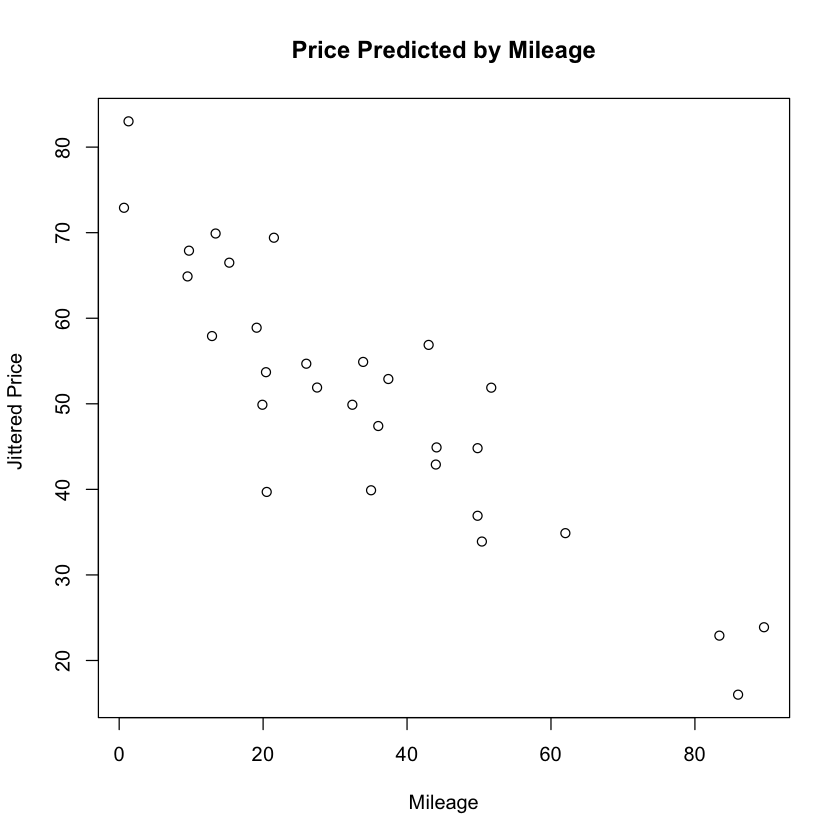

In [2]:
PorschePrice.df<-read.csv("PorschePrice.csv")
dim(PorschePrice.df)
attach(PorschePrice.df)

plot(Mileage,jitter(Price),main="Price Predicted by Mileage",
     ylab="Jittered Price ",xlab="Mileage")

Comments: There seems to be a negative trend between Price and Mileage because as the number of mileage on the Porsche increases, the price of the used Porsche decreases. 

##### B. Add a regression line to the scatterplot. Do you think the line describes the plotted data well? 
It seems that the regression line describes the plot well because the data is spread fairly equally above and below the line; in addition, the line follows the trend that as mileage increases, the price of the used Porsche decreases. 

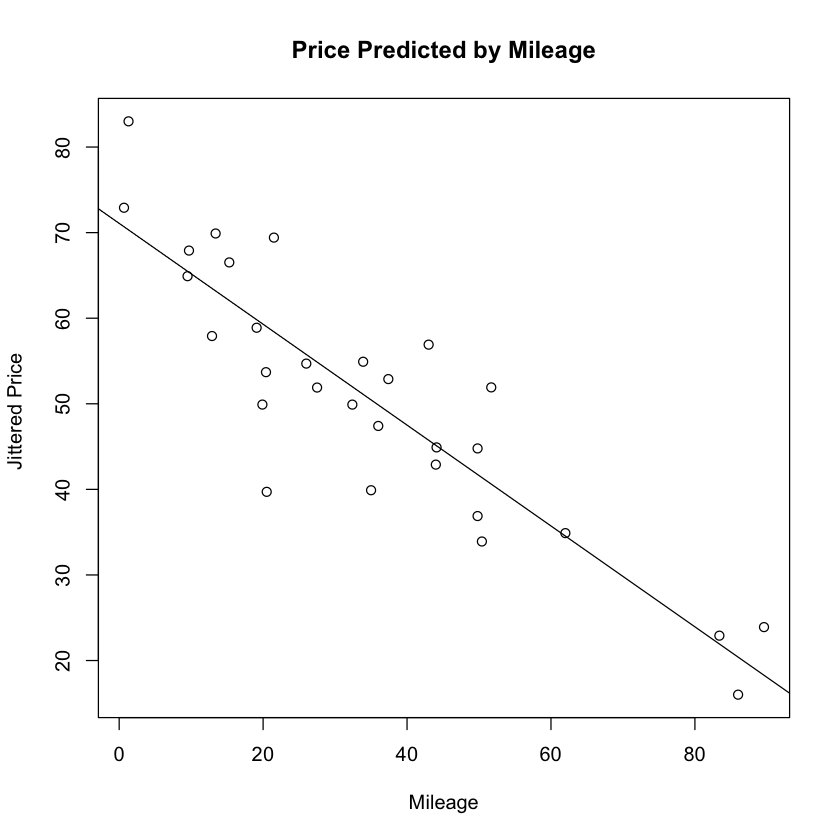

In [3]:
plot(Mileage,jitter(Price),main="Price Predicted by Mileage",
     ylab="Jittered Price ",xlab="Mileage")
abline(lm(Price~Mileage))

##### C. Run the regression of Price on Mileage and interpret what the output gives you. Particularly, report the value for and interpret the meaning of:

The least squares regression line is Price ^ = 71.09 - 0.59(Mileage)

In [4]:
reg.mod <- lm(Price~Mileage,data=PorschePrice.df)
summary(reg.mod)
-0.58940*1000
71.09*1000


Call:
lm(formula = Price ~ Mileage, data = PorschePrice.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3077  -4.0470  -0.3945   3.8374  12.6758 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 71.09045    2.36986    30.0  < 2e-16 ***
Mileage     -0.58940    0.05665   -10.4 3.98e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.17 on 28 degrees of freedom
Multiple R-squared:  0.7945,	Adjusted R-squared:  0.7872 
F-statistic: 108.3 on 1 and 28 DF,  p-value: 3.982e-11


[1] -589.4

[1] 71090

##### i) The intercept and its associated t test; what are the null and alternative hypotheses for 
T test: to test whether the population intercept is not 0

$H_{0}: \beta_{0}=0$
$H_{a}:\beta_{0} \neq 0$

The intercept is 71.09045
Interpretation: A used Porsche with 0 miles on it would be predicted to cost $71090
Because the p value (< 2e-16) is less than 0.05, we have sufficient evidence to reject the null hypothesis that the population intercept is 0. 

##### ii) The slope and its associated t test. What are the null and alternative hypothesis for this test?
T test: to test whether the population slope is not 0

$H_{0}: \beta_{1}=0$
$H_{a}:\beta_{1} \neq 0$

The slope is -0.58940
For every thousand miles, the predicted price of the used Porsche decreases by $589.4
Because the p value (< 2e-16) is less than 0.05, we have sufficient evidence to reject the null hypothesis that the population slope is 0 ie there is no relationship between mileage and price.

##### iii) The R-squared value = 0.7945
79.45% of the variability in the Porsche prices can be explained by the variability in mileage.

##### iv) The standard error of the regression.
The standard error of the regression is  7.17

This means that each of the predicted price deviates typically by $7170 from the actual value.

##### D. Check the assumptions that support this model. Do you believe each assumption is satisified in these data?

Each assumption is satisfied in these data.

Linearity: The scatter plot of Price vs. Mileage shows a consistent decrease in price as the mileage of the used Porsche increases.

Zero mean: We can see that the histogram of residuals is centered around 0. 

Normality:We can look at the histogram of residuals and see there is a fairly normal distribution. We can also see from the qq plot there is not much deviation or curvature from the line ie a good linear pattern.

Constant variance: We can see that the residuals are fairly spread equally above and below 0 in the residual vs. fit plot. 

Independence and Random: We will assume that the sample of used Porsche cars were randomly selected and the pricing of one car does not affect another.

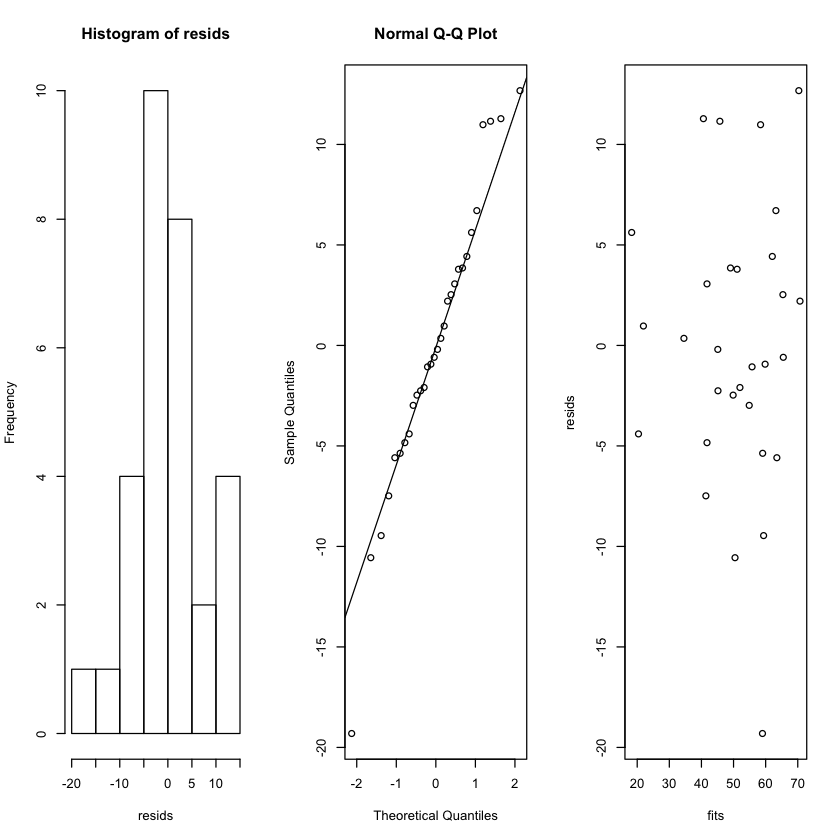

In [5]:
#Check the residual plots
par(mfrow=c(1,3))
resids=residuals(reg.mod )
fits=predict(reg.mod)
hist(resids)
qqnorm(resids)
qqline(resids)       
plot(fits,resids)

##### E. Are there any unusual values in the data set? Outliers? 

There is one unusual value which is the used Porsche that is 6 years old, has 20.5 miles on it, and the price is $39700. 
This may be an outlier because it has a high standard residual: -2.76

,Price,Age,Mileage,fits,stdres
24,39.7,6,20.5,59.00773,-2.757224


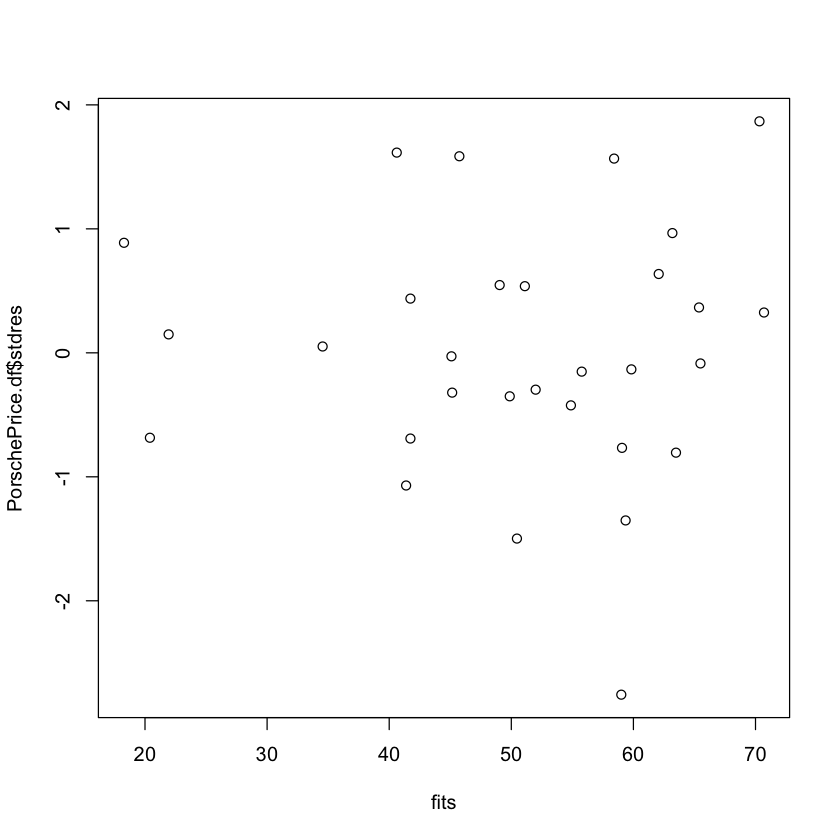

In [6]:
library(MASS)
PorschePrice.df$fits <-predict(reg.mod )
PorschePrice.df$stdres <- stdres(reg.mod)
plot(fits,PorschePrice.df$stdres)

new.df <- PorschePrice.df[which(PorschePrice.df$stdres < -2 |
                          PorschePrice.df$stdres > 2),]
new.df

##### 3.1 Describe the purpose of the link function of a GLM. Define the identity link,and explain why it is not often used with the binomial parameter.


The link function of a GLM connects the response variable Y and the explanatory variables. It specifies a function that relates the mean  to the linear predictors.The identity link models the mean directly and it is the simplest link function that specifies a linear model for $\mu$:

g($\mu$)=$\mu$

The identity link is not often used with the binomial parameter because for the binomial,  the natural parameter is the log of the success probability.